## Kaggle score: 18322 (The lower the better)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/train_fe_v0.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/test_fe_v0.csv')

# Fit model

# Define predictors and target

In [3]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0' ])
x = train[x_columns].values
y = train['SalePrice'].values


## Split data

In [4]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

# Model

In [5]:
# The analysis at the bottom show that the best regularization parameter is alpha = 3 for R2
# For minimize MAE the best alpha was 12

model = Ridge(alpha=3)

model.fit(x_train,y_train)

Ridge(alpha=3)

In [6]:
y_pred = model.predict(x_test)
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [7]:
print(f'R2 = {round(R2,3)} and MAE = {round(MAE,3)}')

R2 = 0.85 and MAE = 21079.716


In [8]:
np.mean(model.coef_**2)/1000000000

0.4837791721613362

# Making predictions

In [9]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,0.117647,0.50,0.255591,0.054322,1.0,1.0,0.000000,0.333333,...,0.25,0.0,0.0,0.5,0.75,0.000000,0.545455,502.5,0.5,0.8
1,1,1462,0.117647,0.75,0.258786,0.066685,1.0,1.0,0.333333,0.333333,...,0.00,0.0,0.0,1.0,0.50,0.806452,0.545455,502.5,0.5,0.8
2,2,1463,0.352941,0.75,0.236422,0.064643,1.0,1.0,0.333333,0.333333,...,0.00,0.0,0.0,0.5,0.75,0.000000,0.272727,502.5,0.5,0.8
3,3,1464,0.352941,0.75,0.249201,0.046638,1.0,1.0,0.333333,0.333333,...,0.00,0.0,0.0,1.0,0.75,0.000000,0.545455,502.5,0.5,0.8
4,4,1465,0.705882,0.75,0.137380,0.023394,1.0,1.0,0.333333,1.000000,...,0.30,0.0,0.0,1.0,0.75,0.000000,0.090909,502.5,0.5,0.8


In [10]:
x_ids = test['Id']
test_columns = test.columns.drop(['Unnamed: 0','Id'])
x_test_2 = test[test_columns].values

x_ids


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [11]:
y_pred_2 = model.predict(x_test_2)

final=pd.DataFrame(data={'Id':x_ids,'SalePrice':y_pred_2})
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [12]:
# Run the code to save predictions in the format used for competition scoring

final.to_csv('submissions/submission_regression_alpha3.csv',index=False)

## mean R2

0.8226101711624294


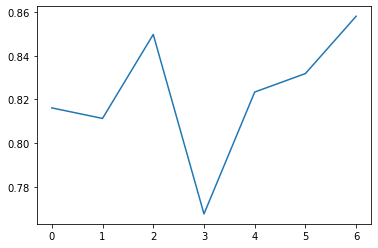

In [13]:
R2s = list()
MAEs = list()
for i in range(3,10):
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=i)
    # start model 
    model = Ridge(alpha=3)
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
plt.plot(R2s)
print(np.mean(R2s))

# Looking for the best regularization parameter

0.01: 0.8262159864460965
0.03: 0.8295670335440163
0.1: 0.8362110051879957
0.3: 0.8424374194788818
1: 0.8473773198012472
3: 0.8497608631796425
10: 0.8442910757683473
30: 0.8193448319549876


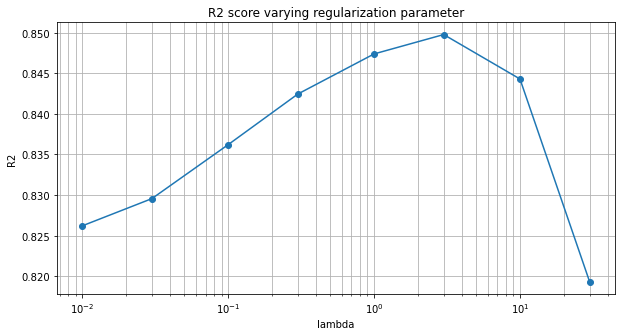

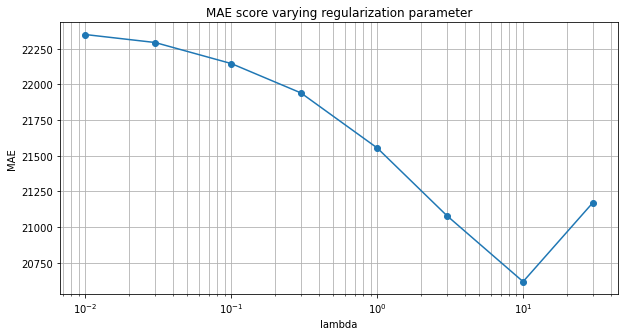

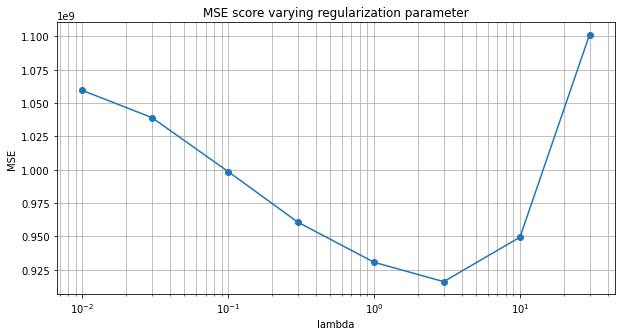

In [14]:
# spliting data
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

lambdas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] 

R2s = list()
MAEs = list()
MSEs = list()

for i in lambdas:
    #model
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    #metrics
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
    MSEs.append(MSE)
    print(f'{i}: {R2}')
    
# Plot R2
plt.figure(figsize=(10,5));    
plt.plot(lambdas,R2s,'-o');
plt.xlabel("lambda");
plt.ylabel("R2");
plt.title("R2 score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MAEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MAEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MAE");
plt.title("MAE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MSEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MSEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MSE");
plt.title("MSE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

0.8426547989337967


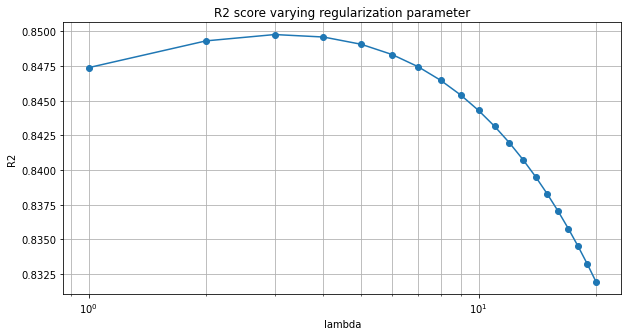

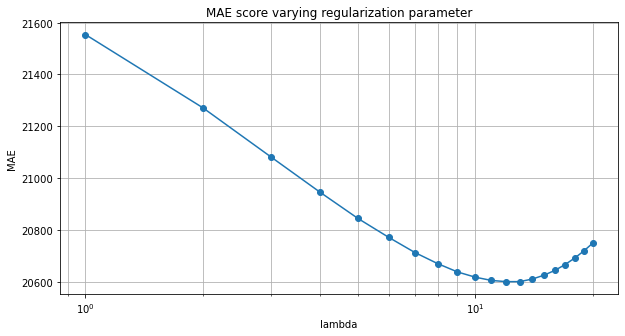

In [15]:
# spliting data
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

lambdas = [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 

R2s = list()
MAEs = list()
MSEs = list()

for i in lambdas:
    #model
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    #metrics
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

print(np.mean(R2s))
    
# Plot R2
plt.figure(figsize=(10,5));    
plt.plot(lambdas,R2s,'-o');
plt.xlabel("lambda");
plt.ylabel("R2");
plt.title("R2 score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MAEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MAEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MAE");
plt.title("MAE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# More relevant features

As the features values are regularized, in some degree we can evaluate the most important features by looking at their absolute values.
I will consider the most revelant features the ones that summed up count for the 80% of the weights.

In this features I will add extra columns including different powers (2,0.5, etc)


In [16]:
coef_dict = dict()

for i in range(len(x_columns)):
    coef_dict[x_columns[i]] = abs(model.coef_[i])

# sorting the dict by values
coef_dict={key: val for key, val in sorted(coef_dict.items(), key = lambda ele: ele[1], reverse = True)}
#list(coef_dict.keys())
coef_dict

{'Neighborhood': 45492.02679728461,
 'OverallQual': 42743.0197082377,
 'KitchenQual': 37148.53389140574,
 'TotRmsAbvGrd': 32549.965638982125,
 'GrLivArea': 31226.725652465317,
 'GarageCars': 29216.049083333197,
 '2ndFlrSF': 25459.692411939264,
 '1stFlrSF': 25151.124918252204,
 'ExterQual': 24753.91934913486,
 'BsmtExposure': 23206.38503127281,
 'GarageArea': 22071.884506986633,
 'BsmtQual': 21757.22482939901,
 'FullBath': 20215.957318896333,
 'RoofStyle': 19993.46903530018,
 'BsmtFullBath': 19839.032417332364,
 'Fireplaces': 19760.06562549134,
 'MSSubClass': 19339.58421263903,
 'ScreenPorch': 18760.901296107255,
 'MasVnrArea': 18008.209076621588,
 'BsmtFinSF1': 17641.960703324145,
 'TotalBsmtSF': 15683.72923845554,
 'FireplaceQu': 14760.190226623168,
 'OverallCond': 14086.293103113152,
 'SaleType': 13092.965876595885,
 'WoodDeckSF': 12166.631573068975,
 'PoolQC': 11893.811723350722,
 'RoofMatl': 11674.90081997215,
 'HalfBath': 10576.6464405095,
 'LandContour': 10207.905440279685,
 'Lot

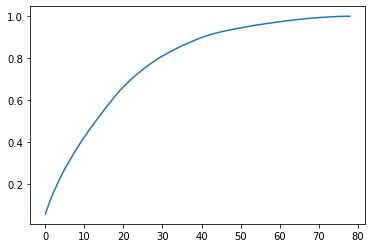

In [17]:
acum_plot = []
acumulator = 0
for i in list(coef_dict.values()):
    acumulator+=i
    acum_plot.append(acumulator)
plt.plot(acum_plot/acumulator);

In [18]:
max_index = 0
for i,a in enumerate(acum_plot/acumulator):
    if a<0.8:
        max_index = i
print(max_index)
most_relevant_features = list(coef_dict.keys())[0:max_index]

29


In [19]:
most_relevant_features

['Neighborhood',
 'OverallQual',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GrLivArea',
 'GarageCars',
 '2ndFlrSF',
 '1stFlrSF',
 'ExterQual',
 'BsmtExposure',
 'GarageArea',
 'BsmtQual',
 'FullBath',
 'RoofStyle',
 'BsmtFullBath',
 'Fireplaces',
 'MSSubClass',
 'ScreenPorch',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'FireplaceQu',
 'OverallCond',
 'SaleType',
 'WoodDeckSF',
 'PoolQC',
 'RoofMatl',
 'HalfBath',
 'LandContour']

# Learn curves

In [22]:
J_trains = list()
J_tests = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in range(100,1410,10):
    # start model 
    model = Ridge(alpha=0.4)
    # fit model
    model.fit(x_train[0:i,:],y_train[0:i])
    # predictions
    y_pred_train = model.predict(x_train[0:i,:])
    y_pred_test = model.predict(x_test[0:i,:])
    J_train = mean_squared_error(y_train[0:i],y_pred_train[0:i])
    J_test = mean_squared_error(y_test[0:i],y_pred_test[0:i])
    J_trains.append(J_train)
    J_tests.append(J_test)



In [24]:
(J_tests[-1]-J_trains[-1])/10000000

-2.9218495130162956

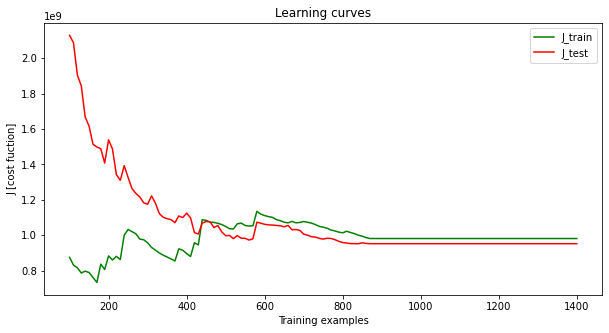

In [23]:
x1 = np.array(range(100,1410,10))

plt.figure(figsize=(10,5));

plt.plot(x1,J_trains,'g',
        x1,J_tests,'r');

plt.xlabel("Training examples");
plt.ylabel("J [cost fuction]");
plt.legend(['J_train','J_test']);
plt.title("Learning curves");